# Homework 2 Question 2

In [173]:
# dependencies
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.core.debugger import set_trace 
from IPython.display import Image
from graphviz import Source
import pydotplus

## Data
### Overview of training and testing data 
 - Zoo data where zoo1 1 is multi_class classification and zoo2 is binary classification
 - test data are at indices `[91, 92, 93, 95, 97, 99]`
### little processing conducted on data but:
 - column 1 has been dropped - animal name is irrelevant as each animal name is unique - point to one hot encode
 - labels in zoo1 have been factorized and seperated
 - train and test features are transformed to numpy matrices 

In [174]:
attributes = ['animal name','hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed',
              'backbone', 'breathes','venomous','fins', 'legs', 'tail', 'domestic', 'catsize' ,'type']

# data
zoo1_df = pd.read_csv('/Users/MasonBaran/PycharmProjects/CS710/hw2/data/zoo1.csv', header=None) # 3 classes (str values)
zoo2_df = pd.read_csv('/Users/MasonBaran/PycharmProjects/CS710/hw2/data/zoo2.csv', header=None) # 2 values (numberic)
# drop animal col for both zoo1 and zoo2 (col_index 1) assuming they will not tell us much
zoo1_df.drop(0, axis=1, inplace=True)
zoo2_df.drop(0, axis=1, inplace=True)

# seperate train and test sets
test_indices = [91, 92, 93, 95, 97, 99]
_,col_shape = zoo1_df.shape # length of column index - 1 == our label feature
###############################################

# factorize specicies labels - use global label_str to retrieve string using encoded label as index
label_col = zoo1_df.iloc[:,col_shape-1]
labels_encoded, label_str = label_col.factorize()
zoo1_df.iloc[:,col_shape-1] = labels_encoded

# zoo1
    # training data
zoo1_train = zoo1_df.drop(zoo1_df.index[test_indices])
zoo1_train_labels = zoo1_train.iloc[:,col_shape-1]
zoo1_train_features = zoo1_train.drop(col_shape, axis=1)
    # testing data
zoo1_test = zoo1_df.iloc[test_indices,:]
zoo1_test_labels = zoo1_test.iloc[:,col_shape-1]
zoo1_test_features = zoo1_test.drop(col_shape, axis=1)
###############################################

# zoo2
    # training data
zoo2_train = zoo2_df.drop(zoo1_df.index[test_indices])
zoo2_train_labels = zoo2_train.iloc[:,col_shape-1]
zoo2_train_features = zoo2_train.drop(col_shape-1, axis=1)
# testing data
zoo2_test = zoo2_df.iloc[test_indices,:]
zoo2_test_labels = zoo2_test.iloc[:,col_shape-1]
zoo2_test_features = zoo2_test.drop(col_shape-1, axis=1)

# global numpy arrays to use for fitting and predicting
Z1_train_features = zoo1_train_features.to_numpy()
Z1_test_features = zoo1_test_features.to_numpy()

Z2_train_features = zoo2_train_features.to_numpy()
Z2_test_features = zoo2_test_features.to_numpy()

## Naive Bayes implementation
stripped down implementation without hyperparameters


In [175]:
class NaiveBayes:
    """parameters: training features (as np array) and training labels (list of string values)"""

    def __init__(self):
        pass

    def fit(self, X, y):
        def occurrences(list1):
            no_of_examples = len(list1)
            prob = dict(Counter(list1))
            for key in prob.keys():
                prob[key] = prob[key] / float(no_of_examples)
            return prob

        self.classes = np.unique(y)
        rows, cols = np.shape(X)
        self.likelihoods = {}
        for cls in self.classes:
            self.likelihoods[cls] = defaultdict(list)
        self.class_probabilities = occurrences(y)
        for cls in self.classes:
            row_indices = np.where(y == cls)[0]
            subset = X[row_indices, :]
            r, c = np.shape(subset)
            for j in range(0, c):
                self.likelihoods[cls][j] += list(subset[:, j])

        for cls in self.classes:
            for j in range(0, cols):
                self.likelihoods[cls][j] = occurrences(self.likelihoods[cls][j])

    def predict(self, sample):
        results = {}
        for cls in self.classes:
            class_probability = self.class_probabilities[cls]
            for i in range(0, len(sample)):
                relative_values = self.likelihoods[cls][i]
                if sample[i] in relative_values.keys():
                    class_probability *= relative_values[sample[i]]
                else:
                    class_probability *= 0
                results[cls] = class_probability
        return max(results, key=lambda key: results[key])

### helper method to print predicts of  a set of predictions

In [176]:
def nb_predict_set(X_test,y_test, nb):
    """use global X, y from calling block..."""
    print(f'[CLASSIFIER] Naive Bayes')
    nb_predictions = []
    for i, r in enumerate(X_test):
        best = nb.predict(r)
        nb_predictions.append(best)
        print(f'Predicted animal is: {label_str[best]}')
        print(f'Correct animal is: {label_str[y_test.iloc[i]]}')

    print('-'*30)
    return nb_predictions

In [177]:
def dec_predict_set(dec_predictions, y_test):
    print('[CLASSIFIER] Decision Tree')
    print('-'*30)
    for i, p in enumerate(d_tree_predictions):
        print(f'Predicted animal is: {label_str[p]}')
        print(f'Correct animal is: {label_str[y_test.iloc[i]]}')
    print('-'*30)

## Sci-kit Learn Decision Tree Implementation
default criterion of `gini_impurity` is used to measure quality of split

In [178]:
tree_clf = DecisionTreeClassifier()
dec_tree = tree_clf.fit(Z1_train_features, zoo1_train_labels)

## Tree Visualization
A tree with max depth 8 

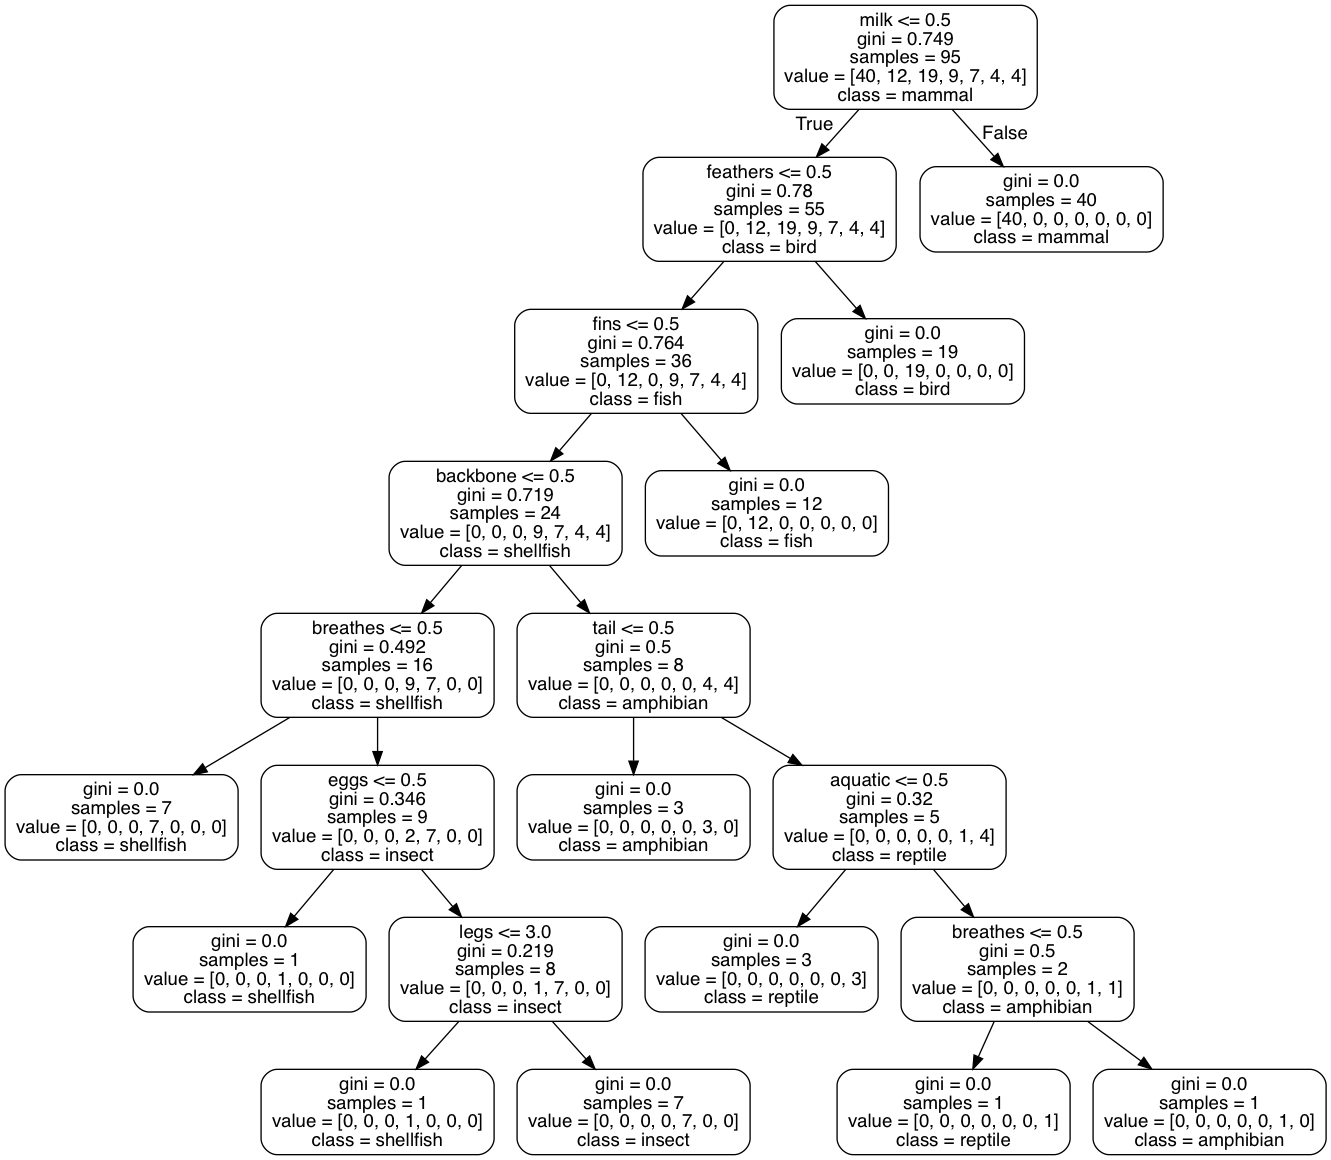

In [179]:
# display tree
from IPython.display import SVG
# graph = Source( tree.export_graphviz(dec_tree, out_file=None, feature_names=attributes[1:len(attributes)-1], rounded=True,
#               class_names = label_str))
# SVG(graph.pipe(format='svg'))

dot_data = tree.export_graphviz(dec_tree, out_file=None, feature_names=attributes[1:len(attributes)-1], rounded=True,
              class_names = label_str)

graph = pydotplus.graph_from_dot_data(dot_data)  # draw 

graph.write_png("zoo_tree.png") # save.png

# Show graph
Image(graph.create_png())

# Predictions

### Decision Tree zoo1

In [180]:
# predict and gauge accuracy on test test
d_tree_predictions = tree_clf.predict(Z1_test_features)
dec_predict_set(d_tree_predictions, zoo1_test_labels)
print(f'Accuracy score for Decision Tree {accuracy_score(d_tree_predictions, zoo1_test_labels)}')

[CLASSIFIER] Decision Tree
------------------------------
Predicted animal is: reptile
Correct animal is: reptile
Predicted animal is: fish
Correct animal is: fish
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: bird
Correct animal is: bird
Predicted animal is: insect
Correct animal is: insect
Predicted animal is: shellfish
Correct animal is: shellfish
------------------------------
Accuracy score for Decision Tree 1.0


### Naive Bayes zoo1

In [181]:
nb = NaiveBayes()
nb.fit(Z1_train_features, zoo1_train_labels)
nb_predictions = nb_predict_set(Z1_test_features,zoo1_test_labels, nb)
print(f'Accuracy score for Decision Tree {accuracy_score(zoo1_test_labels, nb_predictions)}')

[CLASSIFIER] Naive Bayes
Predicted animal is: reptile
Correct animal is: reptile
Predicted animal is: fish
Correct animal is: fish
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: bird
Correct animal is: bird
Predicted animal is: insect
Correct animal is: insect
Predicted animal is: shellfish
Correct animal is: shellfish
------------------------------
Accuracy score for Decision Tree 1.0


### Decision Tree zoo2

In [182]:
tree_clf = DecisionTreeClassifier()
dec_tree = tree_clf.fit(Z2_train_features, zoo2_train_labels)
d_tree2_predictions = dec_tree.predict(Z2_test_features)
dec_predict_set(d_tree2_predictions, zoo2_test_labels)
print(f'Accuracy score for Decision Tree {accuracy_score(zoo2_test_labels, d_tree2_predictions)}')

[CLASSIFIER] Decision Tree
------------------------------
Predicted animal is: reptile
Correct animal is: mammal
Predicted animal is: fish
Correct animal is: mammal
Predicted animal is: mammal
Correct animal is: fish
Predicted animal is: bird
Correct animal is: mammal
Predicted animal is: insect
Correct animal is: mammal
Predicted animal is: shellfish
Correct animal is: mammal
------------------------------
Accuracy score for Decision Tree 1.0


### Naive Bayes zoo2

In [183]:
nb = NaiveBayes()
nb.fit(Z2_train_features, zoo2_train_labels)
nb_predictions = nb_predict_set(Z2_test_features, zoo2_test_labels, nb)
print(f'Accuracy score for Decision Tree {accuracy_score(zoo2_test_labels, nb_predictions)}')

[CLASSIFIER] Naive Bayes
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: fish
Correct animal is: fish
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: mammal
Correct animal is: mammal
Predicted animal is: mammal
Correct animal is: mammal
------------------------------
Accuracy score for Decision Tree 1.0


## Extra credit
Run classifiers of features return from Genetic Algorithm 
#### Reduced features to test
- \# of features - 6, Sequence: `[3,8,10,11,12,14]`
- \# of features - 10, Sequence: `[3,4,5,8,9,10,11,12,14, 15]`
- \# of features - 15, Sequence: `[2,3,4,5,6,7,8,9,10,11,12,13,14,15]`
- \# of features - 17, Sequence: minimum features length is 17 since we drop `str(animal_name)`
